In [6]:
import torch

import requests

import torch.nn as nn

import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from PIL import Image

from io import BytesIO

In [7]:
# Step 1: Load a grayscale image

url = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"

response = requests.get(url)

img = Image.open(BytesIO(response.content)).convert('L') # Convert to grayscale


transform = transforms.Compose([

    transforms.Resize((128,128)),

    transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0) # shape: [1, 1, 128, 128]

In [8]:
# Step 2: Define a sample Conv layer to extract features

conv_layer = nn.Conv2d(1,1, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():

    conv_layer.weight[:] = torch.tensor([[[[-1, -1, -1], [-1, 8 , -1], [-1, -1, -1]]]]) # Edge detection

feature_map = conv_layer(img_tensor)

In [9]:
# Step 3: Define pooling layers

max_pool = nn.MaxPool2d(kernel_size=2)

avg_pool = nn.AvgPool2d(kernel_size=2)


max_pooled = max_pool(feature_map)

avg_pooled = avg_pool(feature_map)

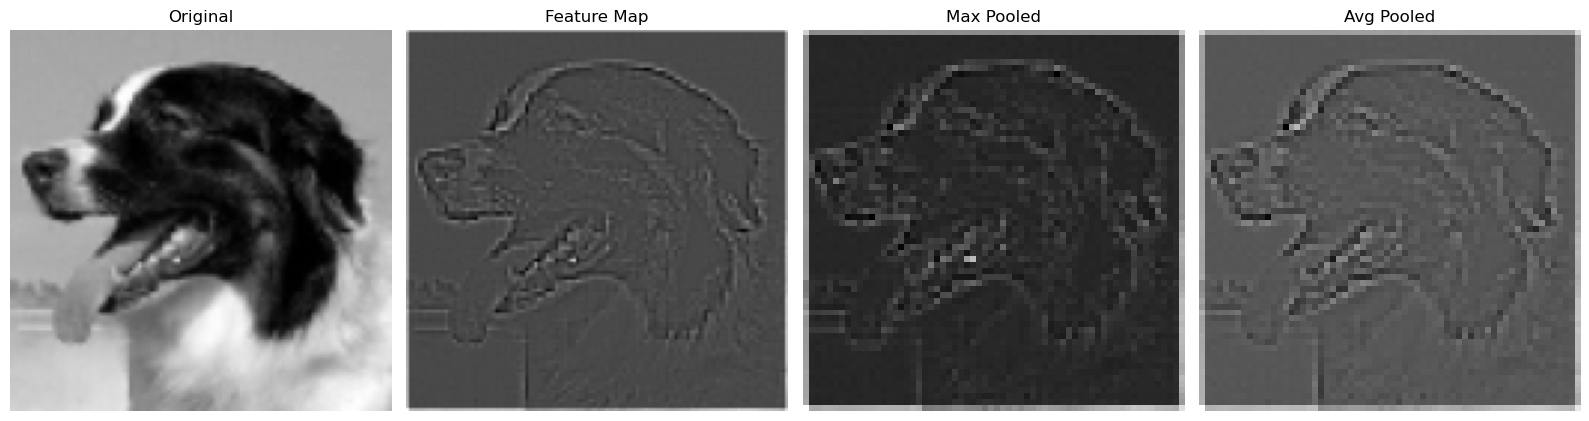

In [10]:
# Step 4: Plot original, feature map, max pool, avg pool

def show_tensor(tensor, title, subplot):

    plt.subplot(1,4, subplot)

    plt.imshow(tensor.squeeze().detach().numpy(), cmap='gray')

    plt.title(title)

    plt.axis('off')


plt.figure(figsize=(16,5))

show_tensor(img_tensor,'Original',1)

show_tensor(feature_map,'Feature Map',2)

show_tensor(max_pooled,'Max Pooled',3)

show_tensor(avg_pooled,'Avg Pooled',4)

plt.tight_layout()

plt.show()